<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'ab_experiment.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 'app_wau.csv',
 'match_result_test.csv',
 'lead_conversion.csv',
 'mall_customers.csv',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 '1_order_payments_dataset.csv',
 'cookie_cats.csv',
 'sales_data_with_stores.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'groceries.csv',
 'sample_data']

In [36]:
df = pd.read_csv('KPMG_VI_New_raw_data_update_final.csv')
df['date'] = pd.to_datetime(df['transaction_date'], format = '%d-%m-%Y')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['product_first_sold_date2'] = pd.to_datetime(df['product_first_sold_date'], unit = 'D', origin = '1900-01-01')
df['diff'] = (df['date'] - df['product_first_sold_date2']).dt.days
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,date,week,product_first_sold_date2,diff
0,1,2,2950,25-02-2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017-02-20,2012-12-04,1544.0
1,2,3,3120,21-05-2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017-05-15,2014-03-05,1173.0
2,3,37,402,16-10-2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017-10-16,1999-07-22,6661.0
3,4,88,3135,31-08-2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017-08-28,1998-12-18,6831.0
4,5,78,787,01-10-2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-09-25,2015-08-12,781.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_id            20000 non-null  int64         
 1   product_id                20000 non-null  int64         
 2   customer_id               20000 non-null  int64         
 3   transaction_date          20000 non-null  object        
 4   online_order              19640 non-null  object        
 5   order_status              20000 non-null  object        
 6   brand                     19803 non-null  object        
 7   product_line              19803 non-null  object        
 8   product_class             19803 non-null  object        
 9   product_size              19803 non-null  object        
 10  list_price                20000 non-null  float64       
 11  standard_cost             19803 non-null  float64       
 12  product_first_sold

In [38]:
df.isnull().sum()

transaction_id                0
product_id                    0
customer_id                   0
transaction_date              0
online_order                360
order_status                  0
brand                       197
product_line                197
product_class               197
product_size                197
list_price                    0
standard_cost               197
product_first_sold_date     197
date                          0
week                          0
product_first_sold_date2    197
diff                        197
dtype: int64

In [39]:
df['online_order'].apply(lambda x : np.where(pd.isnull(x), '?', x)).value_counts()

True     9829
False    9811
?         360
Name: online_order, dtype: int64

<Axes: xlabel='diff', ylabel='Count'>

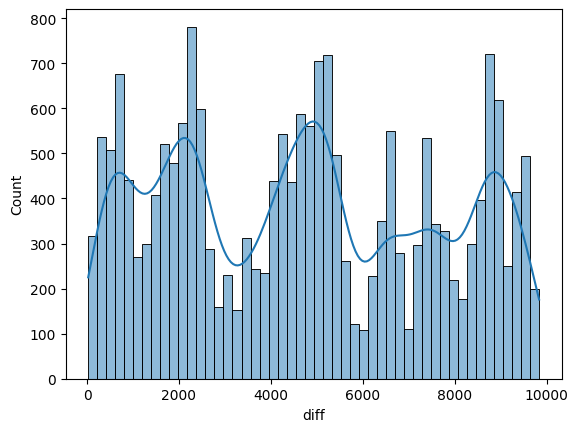

In [41]:
sns.histplot(data = df, x = 'diff', kde = True, bins = 50)

In [48]:
df[~df['brand'].isnull()][['brand','product_id', 'product_first_sold_date2']].drop_duplicates().sort_values(['product_first_sold_date2','brand'])

,brand,product_id,product_first_sold_date2
864,OHM Cycles,56,1991-01-23
1491,OHM Cycles,0,1991-01-23
2085,OHM Cycles,52,1991-01-23
2097,OHM Cycles,53,1991-01-23
2739,OHM Cycles,51,1991-01-23
...,...,...,...
4261,Trek Bicycles,3,2016-12-08
5505,Trek Bicycles,70,2016-12-08
13766,Trek Bicycles,80,2016-12-08
714,WeareA2B,65,2016-12-08


<Axes: xlabel='diff', ylabel='Count'>

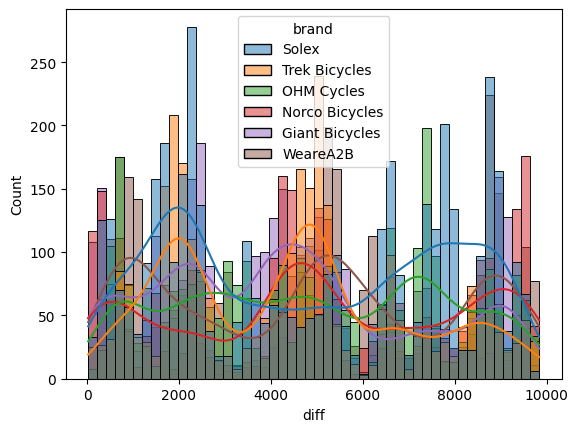

In [52]:
sns.histplot(data = df, x = 'diff', kde = True, bins = 50, hue = 'brand')
plt.show()

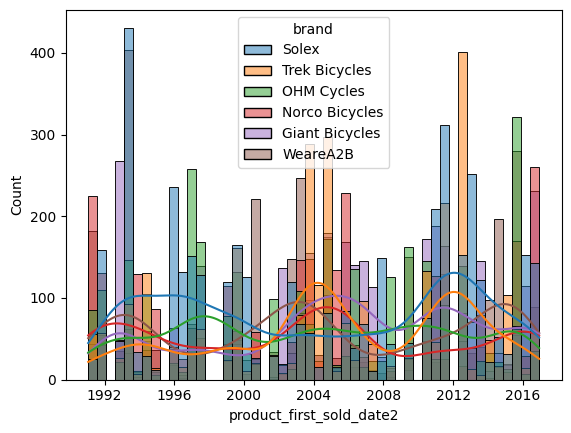

In [51]:
sns.histplot(data = df, x = 'product_first_sold_date2', kde = True, bins = 50, hue = 'brand')
plt.show()

# Iterators

In [53]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [54]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [55]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}